In [1]:
import os
import pickle
import copy

from tqdm import tqdm
from rdkit.Geometry.rdGeometry import Point3D
from rdkit import Chem
from ccdc.conformer import ConformerGenerator
from ccdc.molecule import Molecule

In [2]:
data_dir_path = 'data/'

In [3]:
with open(os.path.join(data_dir_path, 'raw', 'pdbbind_general_conf_ensemble_library_with_h.p'), 'rb') as f :
    general_CEL = pickle.load(f)

In [4]:
with open(os.path.join(data_dir_path, 'raw', 'pdbbind_refined_conf_ensemble_library_with_h.p'), 'rb') as f :
    refined_CEL = pickle.load(f)

In [5]:
all_CEL = general_CEL
all_CEL.merge(refined_CEL)

In [6]:
ccdc_conformer_generator = ConformerGenerator(nthreads=12)
ccdc_conformer_generator.settings.max_conformers = 50

INFO: /home/benoit/CCDC/CSD_2021/bin/mogul
INFO: /home/benoit/CCDC/CSD_2021/bin/mogul
INFO: /home/benoit/CCDC/CSD_2021/bin/mogul
INFO: /home/benoit/CCDC/CSD_2021/bin/mogul
INFO: /home/benoit/CCDC/CSD_2021/bin/mogul
INFO: /home/benoit/CCDC/CSD_2021/bin/mogul
INFO: /home/benoit/CCDC/CSD_2021/bin/mogul
INFO: /home/benoit/CCDC/CSD_2021/bin/mogul
INFO: /home/benoit/CCDC/CSD_2021/bin/mogul
INFO: /home/benoit/CCDC/CSD_2021/bin/mogul
INFO: /home/benoit/CCDC/CSD_2021/bin/mogul
INFO: /home/benoit/CCDC/CSD_2021/bin/mogul
INFO: /home/benoit/CCDC/CSD_2021/bin/mogul


In [7]:
def ccdc_conformers_to_rdkit_mol(ccdc_conformers, rdkit_mol) :
        
    generated_conf_ids = []

    for conformer in ccdc_conformers :
        new_rdkit_conf = copy.deepcopy(rdkit_mol).GetConformer()
        for i, atom in enumerate(conformer.molecule.atoms) :
            point3d = Point3D(*atom.coordinates)
            new_rdkit_conf.SetAtomPosition(i, point3d)
        conf_id = rdkit_mol.AddConformer(new_rdkit_conf, assignId=True)
        generated_conf_ids.append(conf_id)

    return generated_conf_ids

In [8]:
for smiles, conf_ensemble in tqdm(all_CEL.get_unique_molecules()) :
    ccdc_mol = Molecule.from_string(smiles)
    ccdc_conformers = ccdc_conformer_generator.generate(ccdc_mol)
    generated_conf_ids = ccdc_conformers_to_rdkit_mol(ccdc_conformers, conf_ensemble.mol)
#     try :
#         generated_conf_ids = ccdc_conformers_to_rdkit_mol(ccdc_conformers, conf_ensemble.mol)
#     except Exception as e :
#         print(e)

  0%|                                      | 16/12348 [00:09<1:14:02,  2.78it/s]

INFO: /home/benoit/CCDC/CSD_2021/bin/mogul


  0%|                                      | 26/12348 [00:21<3:20:36,  1.02it/s]

INFO: /home/benoit/CCDC/CSD_2021/bin/mogul


  0%|▏                                     | 58/12348 [00:56<3:20:58,  1.02it/s]


RuntimeError: Pre-condition Violation
	
	Violation occurred on line 60 in file Code/GraphMol/Conformer.cpp
	Failed Expression: dp_mol->getNumAtoms() == d_positions.size()
	RDKIT: 2020.09.1
	BOOST: 1_73


In [26]:
mol2 = Chem.MolFromMol2File('../PDBBind/PDBbind_v2020_other_PL/v2020-other-PL/5tyo/5tyo_ligand.mol2', removeHs=False)

In [30]:
[atom.GetSymbol() for atom in mol2.GetAtoms()]

['C',
 'C',
 'C',
 'O',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'B',
 'O',
 'C',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H']

In [50]:
ccdc_mol.set_formal_charges()

In [52]:
[atom.formal_charge for atom in ccdc_mol.atoms]

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [9]:
rdkit_mol = conf_ensemble.mol
generated_conf_ids = []

for conformer in ccdc_conformers :
    new_rdkit_conf = copy.deepcopy(rdkit_mol).GetConformer()
    for i, atom in enumerate(conformer.molecule.atoms) :
        point3d = Point3D(*atom.coordinates)
        new_rdkit_conf.SetAtomPosition(i, point3d)
    conf_id = rdkit_mol.AddConformer(new_rdkit_conf, assignId=True)
    generated_conf_ids.append(conf_id)

RuntimeError: Pre-condition Violation
	
	Violation occurred on line 60 in file Code/GraphMol/Conformer.cpp
	Failed Expression: dp_mol->getNumAtoms() == d_positions.size()
	RDKIT: 2020.09.1
	BOOST: 1_73


In [28]:
rdkit_mol.GetNumAtoms()

31

In [29]:
[atom.GetSymbol() for atom in rdkit_mol.GetAtoms()]

['C',
 'C',
 'C',
 'O',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'B',
 'O',
 'C',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H']

In [44]:
batom_rdkit = rdkit_mol.GetAtomWithIdx(13)

In [45]:
batom_rdkit.GetFormalCharge()

1

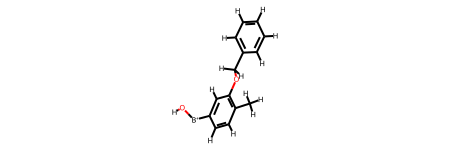

In [46]:
rdkit_mol

In [47]:
from rdkit.Chem.Draw import rdMolDraw2D
other_mol = copy.deepcopy(rdkit_mol)
Chem.rdDepictor.Compute2DCoords(other_mol)
d2d = rdMolDraw2D.MolDraw2DCairo(350,300)
d2d.drawOptions().addAtomIndices=True
d2d.DrawMolecule(other_mol)
d2d.FinishDrawing()
d2d.WriteDrawingText('mol.png')

In [23]:
smiles

'[H]O[B+]c1c([H])c([H])c(C([H])([H])[H])c(OC([H])([H])c2c([H])c([H])c([H])c([H])c2[H])c1[H]'

In [20]:
rdkit_mol.GetConformer().GetProp('PDB_ID')

'5tyo'

In [41]:
test = Chem.MolFromMol2Block(conformer.molecule.to_string(), removeHs=False)

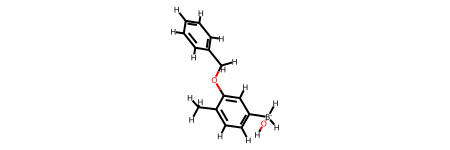

In [42]:
test

In [49]:
ccdc_mol.formal_charge

1

In [48]:
from rdkit.Chem.Draw import rdMolDraw2D
other_mol = copy.deepcopy(test)
Chem.rdDepictor.Compute2DCoords(other_mol)
d2d = rdMolDraw2D.MolDraw2DCairo(350,300)
d2d.drawOptions().addAtomIndices=True
d2d.DrawMolecule(other_mol)
d2d.FinishDrawing()
d2d.WriteDrawingText('mol.png')

In [33]:
ccdc_mol = Molecule.from_string(smiles)

In [37]:
batom = ccdc_mol.atoms[2]

In [39]:
batom.formal_charge

1

In [34]:
[atom for atom in ccdc_mol.atoms]

[Atom(H1),
 Atom(O1),
 Atom(B1),
 Atom(C1),
 Atom(C2),
 Atom(H2),
 Atom(C3),
 Atom(H3),
 Atom(C4),
 Atom(C5),
 Atom(H4),
 Atom(H5),
 Atom(H6),
 Atom(C6),
 Atom(O2),
 Atom(C7),
 Atom(H7),
 Atom(H8),
 Atom(C8),
 Atom(C9),
 Atom(H9),
 Atom(C10),
 Atom(H10),
 Atom(C11),
 Atom(H11),
 Atom(C12),
 Atom(H12),
 Atom(C13),
 Atom(H13),
 Atom(C14),
 Atom(H14),
 Atom(H17),
 Atom(H18)]

In [35]:
smiles

'[H]O[B+]c1c([H])c([H])c(C([H])([H])[H])c(OC([H])([H])c2c([H])c([H])c([H])c([H])c2[H])c1[H]'

In [31]:
[atom for atom in conformer.molecule.atoms]

[Atom(H1),
 Atom(O1),
 Atom(B1),
 Atom(C1),
 Atom(C2),
 Atom(H2),
 Atom(C3),
 Atom(H3),
 Atom(C4),
 Atom(C5),
 Atom(H4),
 Atom(H5),
 Atom(H6),
 Atom(C6),
 Atom(O2),
 Atom(C7),
 Atom(H7),
 Atom(H8),
 Atom(C8),
 Atom(C9),
 Atom(H9),
 Atom(C10),
 Atom(H10),
 Atom(C11),
 Atom(H11),
 Atom(C12),
 Atom(H12),
 Atom(C13),
 Atom(H13),
 Atom(C14),
 Atom(H14),
 Atom(H17),
 Atom(H18)]

In [10]:
new_rdkit_conf.GetNumAtoms()

33

In [11]:
rdkit_mol.GetNumAtoms()

31

In [ ]:
with open(os.path.join(data_dir_path, 'raw', 'pdbbind_conf_ensemble_library_ccdc_generated.p'), 'wb') as f :
    pickle.dump(all_CEL, f)